In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
os.chdir('/content/')

!rm -rf Board-Game-Review-Predictor
!git clone https://github.com/BhushanVasisht/Board-Game-Review-Predictor.git

os.chdir('Board-Game-Review-Predictor')

Cloning into 'Board-Game-Review-Predictor'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

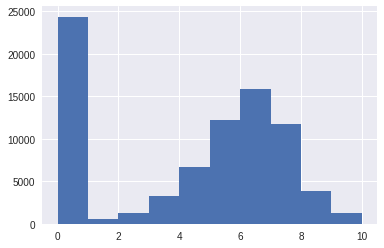

In [27]:
games = pd.read_csv('games.csv')

plt.hist(games["average_rating"])

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

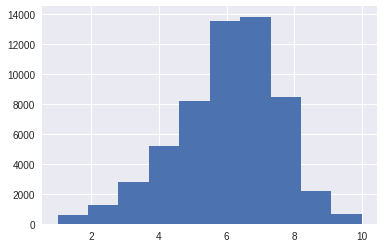

In [28]:
games = games[games['users_rated'] > 0]
games = games.dropna(axis=0)

plt.hist(games["average_rating"])


In [0]:
corrmat = games.corr()

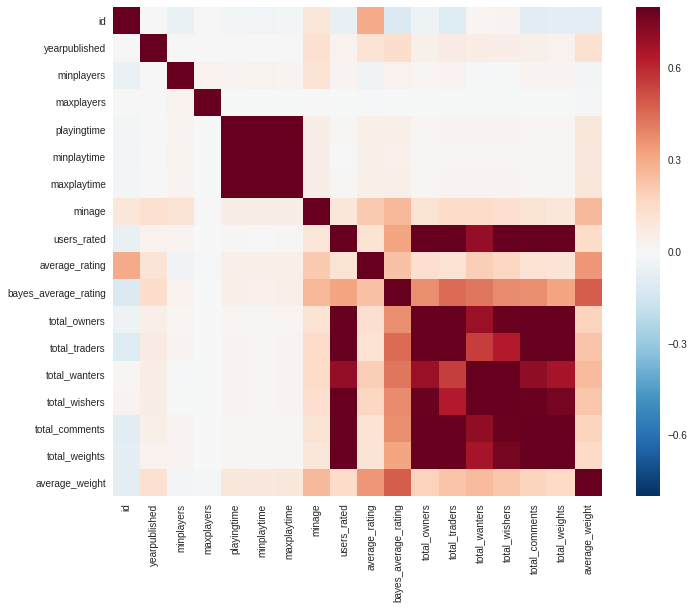

In [30]:
fig = plt.figure(figsize = (12,9))
ax = sns.heatmap(corrmat, vmax=0.8, square=True)

In [0]:
columns = games.columns.tolist()

columns = [c for c in columns if c not in ["bayes_average_rating","average_rating", "id", "type", "name"]]

In [0]:
X = np.array(games[columns])
yrf = np.array(games['average_rating'])

In [33]:
X_trn, X_tst, yrf_trn, yrf_tst = train_test_split(X, yrf, test_size=0.33)
random_forest_model = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10)
random_forest_model.fit(X_trn, yrf_trn)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
predictions = random_forest_model.predict(X_tst)

In [35]:
error = mean_squared_error(yrf_tst, predictions)
error

1.4643135799516354